In [91]:
import numpy as np
import pandas as pd

In [92]:
data=pd.read_csv('Titanic.csv')

In [93]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.964000,38.458000,2.032000,2.005000,247.968650,0.492000
std,288.819436,0.820596,23.103723,1.424431,1.410306,139.301211,0.500186
min,1.000000,1.000000,1.000000,0.000000,0.000000,10.020000,0.000000
25%,250.750000,1.000000,19.000000,1.000000,1.000000,126.295000,0.000000
50%,500.500000,2.000000,36.500000,2.000000,2.000000,246.500000,0.000000
75%,750.250000,3.000000,59.000000,3.000000,3.000000,365.662500,1.000000
max,1000.000000,3.000000,79.000000,4.000000,4.000000,499.780000,1.000000


In [94]:
data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [80]:
data.shape

(1000, 11)

In [95]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,male,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,male,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,male,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,male,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,female,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Pclass       1000 non-null   int64  
 2   Name         1000 non-null   object 
 3   Sex          1000 non-null   object 
 4   Age          1000 non-null   int64  
 5   SibSp        1000 non-null   int64  
 6   Parch        1000 non-null   int64  
 7   Ticket       1000 non-null   object 
 8   Fare         1000 non-null   float64
 9   Embarked     1000 non-null   object 
 10  Survived     1000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.1+ KB


In [97]:
data.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

In [98]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,17,4,2,144.08,Q,1
1,1,male,60,2,2,249.04,S,0
2,3,male,64,0,0,50.31,Q,1
3,3,male,35,4,0,235.20,C,1
4,1,female,70,0,3,160.17,C,1
...,...,...,...,...,...,...,...,...
995,2,male,69,2,3,19.87,Q,1
996,2,female,61,4,4,85.35,C,0
997,3,male,10,4,1,444.22,C,0
998,3,male,50,3,2,234.67,S,1


In [99]:
data['Embarked']=data["Embarked"].map({"C": 0, "Q": 1, "S": 2})
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})

In [100]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,17,4,2,144.08,1,1
1,1,0,60,2,2,249.04,2,0
2,3,0,64,0,0,50.31,1,1
3,3,0,35,4,0,235.20,0,1
4,1,1,70,0,3,160.17,0,1
...,...,...,...,...,...,...,...,...
995,2,0,69,2,3,19.87,1,1
996,2,1,61,4,4,85.35,0,0
997,3,0,10,4,1,444.22,0,0
998,3,0,50,3,2,234.67,2,1


In [104]:
X = data.drop(columns=["Survived"])
y = data["Survived"]

In [105]:
from sklearn.model_selection import*

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [109]:
from sklearn.preprocessing import*

In [110]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
from sklearn.linear_model import*
from sklearn.ensemble import*
from sklearn.metrics import*

In [113]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [114]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [115]:
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [116]:
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Logistic Regression:
Accuracy: 0.5650
              precision    recall  f1-score   support

           0       0.59      0.58      0.59       106
           1       0.54      0.54      0.54        94

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.57      0.56      0.57       200

Confusion Matrix:
[[62 44]
 [43 51]]


In [117]:
print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier:
Accuracy: 0.4950
              precision    recall  f1-score   support

           0       0.52      0.51      0.52       106
           1       0.46      0.48      0.47        94

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.50      0.49      0.50       200

Confusion Matrix:
[[54 52]
 [49 45]]


In [118]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 Fare        0.329522
Age         0.283955
SibSp       0.114459
Parch       0.104658
Embarked    0.068071
Pclass      0.063454
Sex         0.035881
dtype: float64


In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

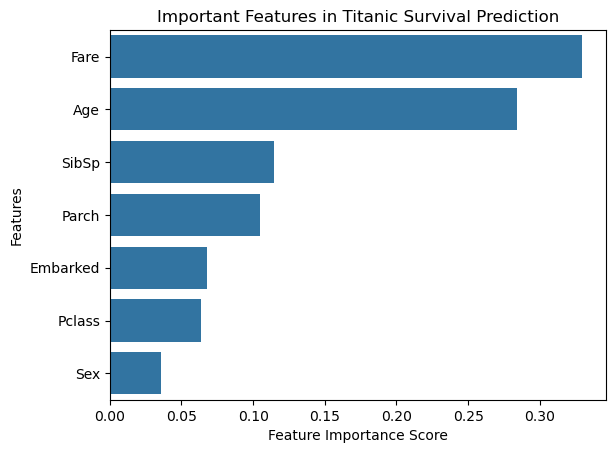

In [124]:
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Important Features in Titanic Survival Prediction")
plt.show()

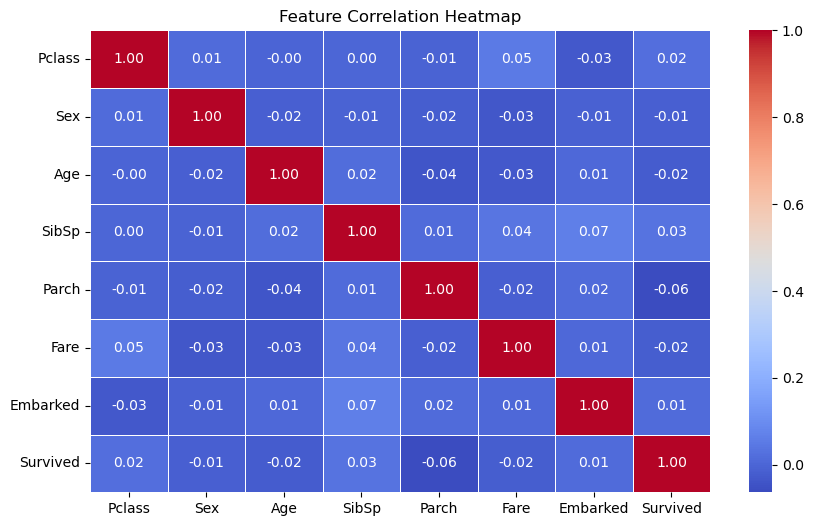

In [130]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [126]:
survival_rate = data.groupby("Survived").mean()
print("Survival Rate Statistics:\n", survival_rate)

Survival Rate Statistics:
             Pclass       Sex        Age     SibSp     Parch        Fare  \
Survived                                                                  
0         1.944882  0.480315  38.972441  1.984252  2.092520  250.547835   
1         1.983740  0.465447  37.926829  2.081301  1.914634  245.305589   

          Embarked  
Survived            
0         0.970472  
1         0.993902  


In [131]:
"""The analysis of the Titanic dataset provides key insights into the factors that influenced passenger survival. The average Pclass for both survivors (1.98) and non-survivors (1.94) suggests that passenger class had minimal impact on survival. However, gender played a role, with the average value being close to 0.47 for both groups (0 = Male, 1 = Female), indicating that women had slightly higher survival rates. The average age of survivors (37.93) and non-survivors (38.97) is nearly identical, showing that age alone was not a strong predictor of survival. The SibSp (siblings/spouses aboard) and Parch (parents/children aboard) values are slightly higher for survivors, implying that passengers with family members had better survival chances. Interestingly, the fare paid by survivors ($245.31) and non-survivors ($250.55) is very close, meaning ticket price alone did not determine survival. Lastly, the Embarked location does not show a strong distinction, but most passengers boarded from similar locations. In summary, while class and fare had little impact, gender and family presence were more influential in determining survival outcomes. Further model tuning and deeper feature engineering could enhance the accuracy of predictions."""

'The analysis of the Titanic dataset provides key insights into the factors that influenced passenger survival. The average Pclass for both survivors (1.98) and non-survivors (1.94) suggests that passenger class had minimal impact on survival. However, gender played a role, with the average value being close to 0.47 for both groups (0 = Male, 1 = Female), indicating that women had slightly higher survival rates. The average age of survivors (37.93) and non-survivors (38.97) is nearly identical, showing that age alone was not a strong predictor of survival. The SibSp (siblings/spouses aboard) and Parch (parents/children aboard) values are slightly higher for survivors, implying that passengers with family members had better survival chances. Interestingly, the fare paid by survivors ($245.31) and non-survivors ($250.55) is very close, meaning ticket price alone did not determine survival. Lastly, the Embarked location does not show a strong distinction, but most passengers boarded from 